<a href="https://colab.research.google.com/github/nhut-ngnn/DPL302m_Material/blob/main/Code/EduNext_Slot5/EduNext_Slot5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import tensorflow as tf

import keras
from keras.models import Sequential
from keras.utils import to_categorical
from keras.utils import plot_model
from keras.optimizers import Adam
from keras.layers import Dense, Activation, Dropout, Flatten, Conv1D, MaxPooling1D, BatchNormalization, ZeroPadding2D, Add, ReLU, LSTM, Bidirectional, Input
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [2]:
data_frame = pd.read_excel('/content/data.xlsx')

In [3]:
data_frame.head(11)
df_preprocess = data_frame.dropna(subset='Unnamed: 0')

In [4]:
df_preprocess = df_preprocess.reset_index(drop=True)
df_preprocess.columns = df_preprocess.iloc[0]
df_preprocess = df_preprocess.drop(0).reset_index(drop=True)
df_preprocess

,STT,Thời điểm đo,NaN,NaN,Điện áp (V),NaN,NaN,Dòng điện (A),NaN,NaN,...,NaN,NaN,Tần số (Hz),NaN,NaN,NaN,I (đm),U (đm),P (đm),Mã trạm
0,1,01/01/22 00:00,01/01/2022 00:01:00,Serial: ML31717088282 - ML3 - Meter NURI\n- TU...,237.234,236.063,237.32,304.2,348.75,334.35,...,NaN,NaN,50.13,50.12,50.12,NaN,811.59,230,560,020343
1,2,01/01/2022 00:30:00,-,Serial: - - -\n- TU: - - TI: - - HSN: -,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-
2,3,01/01/22 01:00,01/01/2022 00:57:00,Serial: ML31717088282 - ML3 - Meter NURI\n- TU...,234.406,233.089,234.427,279.6,297.9,286.05,...,NaN,NaN,50.1,50.1,50.1,NaN,811.59,230,560,020343
3,4,01/01/22 01:30,01/01/2022 01:25:00,Serial: ML31717088282 - ML3 - Meter NURI\n- TU...,235.978,234.657,235.904,260.25,270.3,277.05,...,NaN,NaN,50.02,50.02,50.02,NaN,811.59,230,560,020343
4,5,01/01/22 02:00,01/01/2022 01:54:00,Serial: ML31717088282 - ML3 - Meter NURI\n- TU...,233.935,232.942,234.02,294,279.3,287.85,...,NaN,NaN,49.99,49.99,49.99,NaN,811.59,230,560,020343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26663,26664,20/06/23 13:00,20/06/2023 13:00:00,Serial: ML31717088282 - ML3 - Meter NURI\n- TU...,232.302,232.09,233.033,413.7,455.25,441.45,...,NaN,NaN,49.83,49.83,49.83,NaN,811.59,230,560,020343
26664,26665,20/06/23 13:30,20/06/2023 13:27:00,Serial: ML31717088282 - ML3 - Meter NURI\n- TU...,233.709,233.969,234.602,417,439.5,460.5,...,NaN,NaN,50.03,50.03,50.03,NaN,811.59,230,560,020343
26665,26666,20/06/23 14:00,20/06/2023 13:54:00,Serial: ML31717088282 - ML3 - Meter NURI\n- TU...,234.291,234.486,235.393,411.75,434.1,393.45,...,NaN,NaN,50.08,50.08,50.07,NaN,811.59,230,560,020343
26666,26667,20/06/23 14:30,20/06/2023 14:22:00,Serial: ML31717088282 - ML3 - Meter NURI\n- TU...,235.209,235.167,236.066,407.85,449.55,438.6,...,NaN,NaN,50.04,50.03,50.02,NaN,811.59,230,560,020343


In [5]:
df = df_preprocess.iloc[:, [1, 4]]
df

,Thời điểm đo,Điện áp (V)
0,01/01/22 00:00,237.234
1,01/01/2022 00:30:00,NaN
2,01/01/22 01:00,234.406
3,01/01/22 01:30,235.978
4,01/01/22 02:00,233.935
...,...,...
26663,20/06/23 13:00,232.302
26664,20/06/23 13:30,233.709
26665,20/06/23 14:00,234.291
26666,20/06/23 14:30,235.209


In [6]:
# df = df.dropna(subset='Điện áp (V)')
# df = df.reset_index(drop=True)
# df.shape

In [7]:
# df['Điện áp (V)'] = df['Điện áp (V)'].astype(float)

In [8]:
df['Thời điểm đo'] = pd.to_datetime(df['Thời điểm đo'], errors='coerce')
df['Year'] = df['Thời điểm đo'].dt.year
df['Month'] = df['Thời điểm đo'].dt.month
df['Day'] = df['Thời điểm đo'].dt.day
df['Hour'] = df['Thời điểm đo'].dt.hour
df['Minute'] = df['Thời điểm đo'].dt.minute

<ipython-input-8-9ec06a9c3de3>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Thời điểm đo'] = pd.to_datetime(df['Thời điểm đo'], errors='coerce')
<ipython-input-8-9ec06a9c3de3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Thời điểm đo'] = pd.to_datetime(df['Thời điểm đo'], errors='coerce')
<ipython-input-8-9ec06a9c3de3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

In [9]:
# Check for null values in the 'Year' column
null_years = df['Điện áp (V)'].isnull().sum()
print(f'Number of null values in the Year column: {null_years}')
df = df.dropna(subset='Điện áp (V)')
df = df.reset_index(drop=True)

Number of null values in the Year column: 1391


In [10]:
df['DayOfWeek'] = df['Thời điểm đo'].dt.dayofweek
df['DayOfYear'] = df['Thời điểm đo'].dt.dayofyear
df['Quarter'] = df['Thời điểm đo'].dt.quarter
df['IsWeekend'] = df['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)

In [11]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['Season'] = df['Month'].apply(get_season)

df['Hour_sin'] = np.sin(2 * np.pi * df['Hour'] / 24)
df['Hour_cos'] = np.cos(2 * np.pi * df['Hour'] / 24)

df['Month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
df['Month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)

In [12]:
df['TimeDifference'] = df['Thời điểm đo'] - df['Thời điểm đo'].shift(1)

In [13]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
season_encoded = encoder.fit_transform(df[['Season']]).toarray()

In [14]:
# Map the season names to numerical values
season_mapping = {'Winter': 0.0, 'Spring': 1.0, 'Summer': 2.0, 'Fall': 3.0}
df['Season'] = df['Season'].map(season_mapping).astype(float)

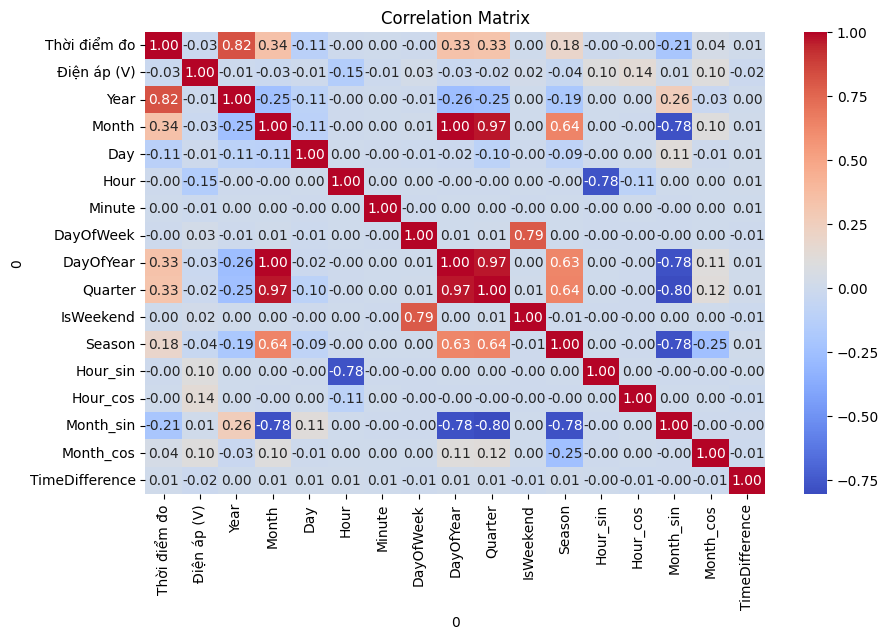

In [15]:
import seaborn as sns

# Select the relevant columns
cols = df.columns
corr_matrix = df[cols].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [16]:
df = df.dropna(subset='TimeDifference')
df = df.reset_index(drop=True)
df

,Thời điểm đo,Điện áp (V),Year,Month,Day,Hour,Minute,DayOfWeek,DayOfYear,Quarter,IsWeekend,Season,Hour_sin,Hour_cos,Month_sin,Month_cos,TimeDifference
0,2022-01-01 01:00:00,234.406,2022,1,1,1,0,5,1,1,1,0.0,2.588190e-01,0.965926,5.000000e-01,0.866025,0 days 01:00:00
1,2022-01-01 01:30:00,235.978,2022,1,1,1,30,5,1,1,1,0.0,2.588190e-01,0.965926,5.000000e-01,0.866025,0 days 00:30:00
2,2022-01-01 02:00:00,233.935,2022,1,1,2,0,5,1,1,1,0.0,5.000000e-01,0.866025,5.000000e-01,0.866025,0 days 00:30:00
3,2022-01-01 02:30:00,235.131,2022,1,1,2,30,5,1,1,1,0.0,5.000000e-01,0.866025,5.000000e-01,0.866025,0 days 00:30:00
4,2022-01-01 03:00:00,235.016,2022,1,1,3,0,5,1,1,1,0.0,7.071068e-01,0.707107,5.000000e-01,0.866025,0 days 00:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25271,2023-06-20 12:30:00,230.992,2023,6,20,12,30,1,171,2,0,2.0,1.224647e-16,-1.000000,1.224647e-16,-1.000000,0 days 00:30:00
25272,2023-06-20 13:00:00,232.302,2023,6,20,13,0,1,171,2,0,2.0,-2.588190e-01,-0.965926,1.224647e-16,-1.000000,0 days 00:30:00
25273,2023-06-20 13:30:00,233.709,2023,6,20,13,30,1,171,2,0,2.0,-2.588190e-01,-0.965926,1.224647e-16,-1.000000,0 days 00:30:00
25274,2023-06-20 14:00:00,234.291,2023,6,20,14,0,1,171,2,0,2.0,-5.000000e-01,-0.866025,1.224647e-16,-1.000000,0 days 00:30:00


In [17]:

df['TimeDifference_hours'] = df['TimeDifference'].dt.components['hours']
df['TimeDifference_minutes'] = df['TimeDifference'].dt.components['minutes']

df['TimeDifference_hours_sin']= np.sin(2 * np.pi * df['TimeDifference_hours'] / 24)
df['TimeDifference_hours_cos']= np.cos(2 * np.pi * df['TimeDifference_hours'] / 24)

df['TimeDifference_minutes_sin']= np.sin(2 * np.pi * df['TimeDifference_minutes'] / 60)
df['TimeDifference_minutes_cos']= np.cos(2 * np.pi * df['TimeDifference_minutes'] / 60)

In [18]:
df.columns

Index(['Thời điểm đo', 'Điện áp (V)', 'Year', 'Month', 'Day', 'Hour', 'Minute',
       'DayOfWeek', 'DayOfYear', 'Quarter', 'IsWeekend', 'Season', 'Hour_sin',
       'Hour_cos', 'Month_sin', 'Month_cos', 'TimeDifference',
       'TimeDifference_hours', 'TimeDifference_minutes',
       'TimeDifference_hours_sin', 'TimeDifference_hours_cos',
       'TimeDifference_minutes_sin', 'TimeDifference_minutes_cos'],
      dtype='object', name=0)

In [19]:
columns_to_convert = [ 'Điện áp (V)', 'Year', 'Month', 'Day', 'Hour', 'Minute',
       'DayOfWeek', 'DayOfYear', 'Quarter', 'IsWeekend', 'Season', 'Hour_sin',
       'Hour_cos', 'Month_sin', 'Month_cos', 'TimeDifference_hours', 'TimeDifference_minutes',
       'TimeDifference_hours_sin', 'TimeDifference_hours_cos',
       'TimeDifference_minutes_sin', 'TimeDifference_minutes_cos']
df_preprocess = df[columns_to_convert].astype(float)
df_preprocess.dtypes

,0
0,
Điện áp (V),float64
Year,float64
Month,float64
Day,float64
Hour,float64
Minute,float64
DayOfWeek,float64
DayOfYear,float64
Quarter,float64


In [20]:
minmax_scaler = MinMaxScaler()
standard_scaler = StandardScaler()
columns_to_normalize = df_preprocess.columns[1:]

df_preprocess['Điện áp (V)'] = minmax_scaler.fit_transform(df_preprocess[['Điện áp (V)']])
df_preprocess['Điện áp (V)'] = standard_scaler.fit_transform(df_preprocess[['Điện áp (V)']])
df_preprocess[columns_to_normalize] = standard_scaler.fit_transform(df_preprocess[columns_to_normalize])


In [21]:
# from sklearn.metrics import r2_score
# from sklearn.model_selection import train_test_split

# def find_best_n_clusters(df_preprocess, max_clusters=20):
#   best_r2 = -float('inf')
#   best_n_clusters = 0
#   for n_clusters in range(2, max_clusters + 1):
#     kmeans = KMeans(n_clusters=n_clusters, random_state=42)
#     kmeans.fit(df_preprocess)
#     df_preprocess['KMean_Cluster'] = kmeans.labels_

#     X = df_preprocess.drop('Điện áp (V)', axis=1)
#     y = df_preprocess['Điện áp (V)']

#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#     model = Sequential()
#     model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
#     model.add(Dense(32, activation='relu'))
#     model.add(Dense(1))

#     model.compile(loss='mse', optimizer='adam')
#     model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

#     y_pred = model.predict(X_test)
#     r2 = r2_score(y_test, y_pred)

#     if r2 > best_r2:
#       best_r2 = r2
#       best_n_clusters = n_clusters

#   return best_n_clusters, best_r2

# # Example usage:
# best_n, best_score = find_best_n_clusters(df_preprocess)
# print(f"Best number of clusters: {best_n}")
# print(f"Best R2 score: {best_score}")

In [22]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=15, random_state=42)
kmeans.fit_predict(df_preprocess[['DayOfYear']])
df_preprocess['KMean_Cluster_DoY'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [23]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=12, random_state=42)
kmeans.fit_predict(df_preprocess[['Hour']])
df_preprocess['KMean_Cluster_Hour'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [24]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit_predict(df_preprocess[['Month']])
df_preprocess['KMean_Cluster_Month'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [25]:
kmeans = KMeans(n_clusters=60, random_state=42)
kmeans.fit_predict(df_preprocess[['Minute']])
df_preprocess['KMean_Cluster_Minute'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (60). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


In [26]:
kmeans = KMeans(n_clusters=8, random_state=42)
kmeans.fit(df_preprocess)

df_preprocess['KMean_Cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [27]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import numpy as np

Z = linkage(df_preprocess, method='ward')

num_clusters = 8
cluster_labels = fcluster(Z, num_clusters, criterion='maxclust')
df_preprocess['fcluster'] = cluster_labels

In [28]:
df_preprocess.columns

Index(['Điện áp (V)', 'Year', 'Month', 'Day', 'Hour', 'Minute', 'DayOfWeek',
       'DayOfYear', 'Quarter', 'IsWeekend', 'Season', 'Hour_sin', 'Hour_cos',
       'Month_sin', 'Month_cos', 'TimeDifference_hours',
       'TimeDifference_minutes', 'TimeDifference_hours_sin',
       'TimeDifference_hours_cos', 'TimeDifference_minutes_sin',
       'TimeDifference_minutes_cos', 'KMean_Cluster_DoY', 'KMean_Cluster_Hour',
       'KMean_Cluster_Month', 'KMean_Cluster_Minute', 'KMean_Cluster',
       'fcluster'],
      dtype='object', name=0)

In [29]:
from sklearn.impute import KNNImputer

columns_to_impute =  ['Year', 'Month', 'Day', 'Hour', 'Minute', 'DayOfWeek',
       'DayOfYear', 'Quarter', 'IsWeekend', 'Season', 'Hour_sin', 'Hour_cos',
       'Month_sin', 'Month_cos', 'TimeDifference_hours',
       'TimeDifference_minutes', 'TimeDifference_hours_sin',
       'TimeDifference_hours_cos', 'TimeDifference_minutes_sin',
       'TimeDifference_minutes_cos']

df_impute = df_preprocess[columns_to_impute].astype(float)
imputer = KNNImputer(n_neighbors=10)
df_impute[columns_to_impute] = imputer.fit_transform(df_impute[columns_to_impute])
df_preprocess[columns_to_impute] = df_impute[columns_to_impute]

In [30]:
X = df_preprocess[['Year', 'Month', 'Day', 'Hour', 'Minute', 'DayOfWeek',
       'DayOfYear', 'Quarter', 'IsWeekend', 'Season', 'Hour_sin', 'Hour_cos',
       'Month_sin', 'Month_cos', 'TimeDifference_hours',
       'TimeDifference_minutes', 'TimeDifference_hours_sin',
       'TimeDifference_hours_cos', 'TimeDifference_minutes_sin',
       'TimeDifference_minutes_cos', 'KMean_Cluster_DoY', 'KMean_Cluster_Hour',
       'KMean_Cluster', 'fcluster', 'KMean_Cluster_Month',
       'KMean_Cluster_Minute']]
Y = df_preprocess['Điện áp (V)']
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.2, random_state=42)
# X_valid, X_test, Y_valid, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

In [31]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=150, random_state=42)

model = rf_model.fit(X_train, Y_train)

y_pred_rf = rf_model.predict(X_temp)

r2_test = r2_score(Y_temp, y_pred_rf)
print(f'R² Score on Test Set: {r2_test}')

R² Score on Test Set: 0.25045007095772653


In [32]:
df_preprocess.to_csv('/content/df_preprocess.csv', index=False)

In [33]:
df= pd.read_csv('/content/df_preprocess.csv')
df.columns

Index(['Điện áp (V)', 'Year', 'Month', 'Day', 'Hour', 'Minute', 'DayOfWeek',
       'DayOfYear', 'Quarter', 'IsWeekend', 'Season', 'Hour_sin', 'Hour_cos',
       'Month_sin', 'Month_cos', 'TimeDifference_hours',
       'TimeDifference_minutes', 'TimeDifference_hours_sin',
       'TimeDifference_hours_cos', 'TimeDifference_minutes_sin',
       'TimeDifference_minutes_cos', 'KMean_Cluster_DoY', 'KMean_Cluster_Hour',
       'KMean_Cluster_Month', 'KMean_Cluster_Minute', 'KMean_Cluster',
       'fcluster'],
      dtype='object')

In [34]:
sentences = df_preprocess.apply(lambda row: [
    str(row['Year']),
    str(row['Month']),
    str(row['Day']),
    str(row['Hour']),
    str(row['Minute']),
    str(row['DayOfWeek']),
    str(row['DayOfYear']),
    str(row['Quarter']),
    str(row['IsWeekend']),
    str(row['Season']),
    str(row['Hour_sin']),
    str(row['Hour_cos']),
    str(row['Month_sin']),
    str(row['Month_cos']),
    str(row['TimeDifference_hours']),
    str(row['TimeDifference_minutes']),
    str(row['TimeDifference_hours_sin']),
    str(row['TimeDifference_hours_cos']),
    str(row['TimeDifference_minutes_sin']),
    str(row['TimeDifference_minutes_cos']),
    str(row['KMean_Cluster_DoY']),
    str(row['KMean_Cluster_Month']),
    str(row['KMean_Cluster_Hour']),
    str(row['KMean_Cluster_Minute']),
    str(row['fcluster']),
    str(row['KMean_Cluster']),
], axis=1).tolist()

In [35]:
from gensim.models import Word2Vec

model = Word2Vec(sentences=sentences, vector_size=41, window=20, min_count=1, sg=1)

def embed_sentence(sentence):
    return np.mean([model.wv[word] for word in sentence], axis=0)

embedded_sentences = np.array([embed_sentence(sentence) for sentence in sentences])

df_word2vec = pd.DataFrame(embedded_sentences, columns=[f'vec_{i}' for i in range(embedded_sentences.shape[1])])

df_combined = pd.concat([df_word2vec, df['Điện áp (V)']], axis=1)

print(df_combined.head())

      vec_0     vec_1     vec_2     vec_3     vec_4     vec_5     vec_6  \
0  0.003659 -0.327459 -0.262865  0.142567  0.266306 -0.064132 -0.032488   
1 -0.154082 -0.151036 -0.291067  0.078154  0.202150  0.009084 -0.139299   
2 -0.107222 -0.129493 -0.347732 -0.023606  0.222500 -0.021668 -0.112708   
3 -0.114784 -0.127309 -0.353763 -0.019507  0.213346 -0.029458 -0.101724   
4 -0.084396 -0.176720 -0.234399 -0.132146  0.188052  0.015024 -0.135232   

      vec_7     vec_8     vec_9  ...    vec_32    vec_33    vec_34    vec_35  \
0 -0.173114  0.217511 -0.099268  ... -0.106048  0.417055 -0.300145  0.053058   
1 -0.304702  0.250284 -0.026021  ... -0.027278  0.240069 -0.229390  0.199804   
2 -0.244671  0.207818  0.119951  ... -0.021341  0.209935 -0.301215  0.242737   
3 -0.254240  0.205250  0.114177  ... -0.021810  0.214565 -0.292542  0.250744   
4 -0.252649  0.143168  0.028459  ...  0.039195  0.233409 -0.353884  0.231243   

     vec_36    vec_37    vec_38    vec_39    vec_40  Điện áp (V)  
0

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X = df_combined.drop(columns=['Điện áp (V)'])
y = df_combined['Điện áp (V)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Huấn luyện mô hình Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [37]:
# Dự đoán
y_pred = rf.predict(X_test)

# Đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_test, y_pred)
print(f'R2 Score: {r2}')

Mean Squared Error: 0.820414565842683
R2 Score: 0.16203571278259576


In [ ]:
from sklearn.impute import KNNImputer
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

# Chuẩn bị dữ liệu
X = df_combined.drop(columns=['Điện áp (V)'])
y = df_combined['Điện áp (V)']

# Tạo mô hình Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)  # K=5 folds
scorer = make_scorer(mean_squared_error, greater_is_better=False)
cv_scores = cross_val_score(rf, X, y, cv=kf, scoring=scorer)

mean_mse = -np.mean(cv_scores)
std_mse = np.std(cv_scores)

print(f'Mean MSE: {mean_mse}')
print(f'Standard Deviation of MSE: {std_mse}')


In [38]:
from sklearn.impute import KNNImputer
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Chuẩn bị dữ liệu
X = df_combined.drop(columns=['Điện áp (V)'])
y = df_combined['Điện áp (V)']

# Sử dụng KNNImputer để xử lý missing data
imputer = KNNImputer(n_neighbors=5)  # Sử dụng K=5 để tìm hàng xóm gần nhất
X_imputed = imputer.fit_transform(X)  # Điền missing values trong X

# Define DNN architecture
def create_dnn_model(input_dim):
    model = Sequential()

    # Input layer + first hidden layer
    model.add(Dense(units=128, activation='relu', input_dim=input_dim))
    model.add(Dropout(0.3))  # Dropout for regularization

    # Second hidden layer
    model.add(Dense(units=64, activation='relu'))
    model.add(Dropout(0.3))

    # Third hidden layer
    model.add(Dense(units=32, activation='relu'))

    # Output layer (for regression, a single unit without activation)
    model.add(Dense(units=1))

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

    return model

# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold = 1
mse_scores = []

# Perform K-Fold cross-validation
for train_index, test_index in kf.split(X_imputed):
    X_train, X_test = X_imputed[train_index], X_imputed[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Create the model
    model = create_dnn_model(X_train.shape[1])

    # Train the model
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0, validation_data=(X_test, y_test))

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

    print(f'Fold {fold} - MSE: {mse}')
    fold += 1

# Print average and standard deviation of MSE
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)
print(f'Mean MSE: {mean_mse}')
print(f'Standard Deviation of MSE: {std_mse}')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Fold 1 - MSE: 0.8791578533317523


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Fold 2 - MSE: 0.8821210522515582


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Fold 3 - MSE: 0.9084875992471426


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Fold 4 - MSE: 0.8967366259395823


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Fold 5 - MSE: 0.8890677047278585
Mean MSE: 0.8911141670995788
Standard Deviation of MSE: 0.010596846227220708
